# COGS 108 - EDA Checkpoint

# Names

- Alec Panattoni
- Tyler Tran
- Sophia Lui
- Rodolfo Cardenas

<a id='research_question'></a>
# Research Question

*Is there a relationship between the adoption outcomes for shelter animals in California and the onset (and continuation) of COVID-19 related lockdowns beginning in March 2020 and onwards?*

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os

In [2]:
shelter_data = pd.read_csv("shelter_cleaned.csv")

# Data Cleaning

Describe your data cleaning steps here.

-reference DataCheckpointGroup088-Fa21.ipynb-
1. Analyzed the columns to see which information is necessary for our research question/that might impact the results
2. Isolated the missing values and discussed about the possible reasons as to why that is. As such, we looked at the individual amounts that are missing and decided whether or not this would be significant to our research. Created visuals to see the possible relationships between the variables that are missing.  
3. Took a look at the types of animals that are brought in and decided to eliminate Others because the number of others is insignificant compared to the number of cats and dogs.  

# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

look at eda discussion, shape, data types, correlations, plotting things over time, look at patterns, and plots

is a dog related to an outcome, 
are dogs more likely to be adopted compared to cats? 
make it more statistical

https://towardsdatascience.com/sweetviz-automated-eda-in-python-a97e4cabacde


In [3]:
shelter_data

# datetime conversion for date of birth, intake date, and outcome date
shelter_data["Date Of Birth"] = pd.to_datetime(shelter_data["Date Of Birth"])
shelter_data["Intake Date"] = pd.to_datetime(shelter_data["Intake Date"])
shelter_data["Outcome Date"] = pd.to_datetime(shelter_data["Outcome Date"])

In [4]:
shelter_data.shape

(20176, 29)

In [5]:
shelter_data['Type'].value_counts()

DOG    12347
CAT     7829
Name: Type, dtype: int64

In [6]:
shelter_data.head()

,Unnamed: 0,Name,Named by Shelter,Type,Breed,Color,Sex,Protected,Size,Date Of Birth,...,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count,Age,Before Covid
0,0,REMY,False,DOG,BEAGLE,BLACK/WHITE,Female,False,MED,2014-04-11,...,OVER THE COUNTER_WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1,8.0,True
1,1,RONDE,True,DOG,CHIHUAHUA SH,TAN,Male,True,SMALL,2020-07-24,...,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,*PETALUMA,94954.0,"94954(38.245316, -122.59871)",1,1.0,True
2,2,SNOOP,True,CAT,DOMESTIC SH,GRAY,Male,True,SMALL,2019-08-04,...,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95405.0,"95405(38.439152, -122.672541)",1,2.0,True
3,3,FIFI,False,CAT,SIAMESE,SEAL PT,Female,True,KITTN,2020-10-27,...,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1,1.0,True
4,4,MERLIN,True,CAT,DOMESTIC SH,BRN TABBY,Male,True,SMALL,2018-01-16,...,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,COUNTY,94952.0,"94952(38.236012, -122.730241)",1,4.0,True


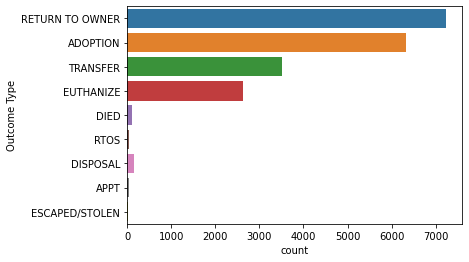

In [7]:
#fig = pd.plotting.scatter_matrix(shelter_data[['Outcome Type', 'Breed']])
#msno.heatmap(shelter_data, figsize=(12, 6))
#msno.heatmap(shelter_data['Outcome Type'].value_counts(normalize=True),figsize=(12, 6))

sns.countplot(y=shelter_data["Outcome Type"])


In [8]:
dogs = shelter_data[shelter_data['Type'].isin(['DOG'])]['Outcome Type']
cats = shelter_data[shelter_data['Type'].isin(['CAT'])]['Outcome Type']

dogs_df_total = dogs.value_counts(normalize=True).rename_axis('unique_values').to_frame('counts')
cats_df_total = cats.value_counts(normalize=True).rename_axis('unique_values').to_frame('counts')

In [35]:
dogs_df_total

,unique_values,counts
1,ADOPTION,0.244716
7,APPT,0.001061
4,DIED,0.002122
6,DISPOSAL,0.001795
8,ESCAPED/STOLEN,0.000408
3,EUTHANIZE,0.106650
0,RETURN TO OWNER,0.503631
5,RTOS,0.002122
2,TRANSFER,0.137495


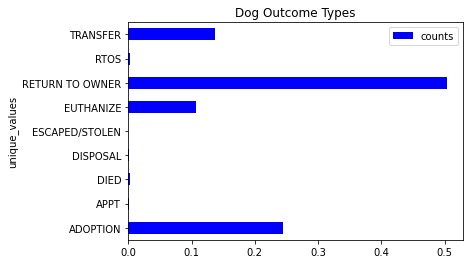

In [9]:
# Plot a bar chart

dogs_df_total = dogs_df_total.reset_index().sort_values('unique_values',ascending=True)

dogs_df_total.plot.barh(x='unique_values', y='counts',
title='Dog Outcome Types', color='blue')


,unique_values,counts
0,ADOPTION,0.426937
6,APPT,0.003341
5,DIED,0.010024
4,DISPOSAL,0.015936
7,ESCAPED/STOLEN,0.000900
2,EUTHANIZE,0.170287
3,RETURN TO OWNER,0.137257
8,RTOS,0.000643
1,TRANSFER,0.234674


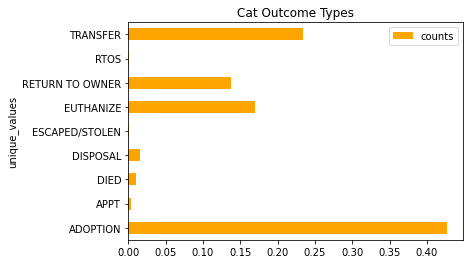

In [10]:
cats_df_total = cats_df_total.reset_index().sort_values('unique_values',ascending=True)

cats_df_total.plot.barh(x='unique_values', y='counts',
title='Cat Outcome Types', color='orange')


cats_df_total

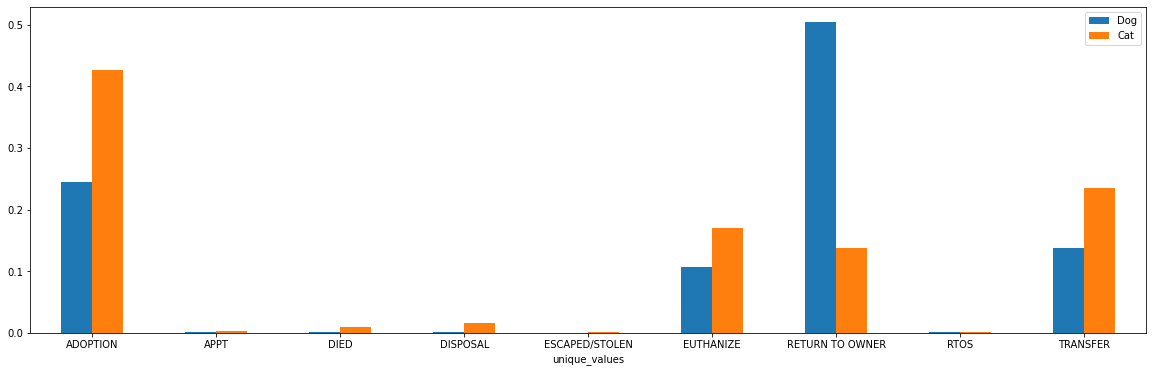

In [11]:
# MAKE PROPORITIONS TO COMPARE 
dog_total = dogs_df_total['counts'].values.tolist()

cat_total = cats_df_total['counts'].values.tolist()
index = dogs_df_total['unique_values']
index
dogCat_total = pd.DataFrame({'Dog': dog_total,'Cat': cat_total}, index=index)
dogCat_total
ax = dogCat_total.plot.bar(rot=0,figsize=(20, 6))

In [12]:
cats_df_total

,unique_values,counts
0,ADOPTION,0.426937
6,APPT,0.003341
5,DIED,0.010024
4,DISPOSAL,0.015936
7,ESCAPED/STOLEN,0.000900
2,EUTHANIZE,0.170287
3,RETURN TO OWNER,0.137257
8,RTOS,0.000643
1,TRANSFER,0.234674


In [13]:
dogs_df_total

,unique_values,counts
1,ADOPTION,0.244716
7,APPT,0.001061
4,DIED,0.002122
6,DISPOSAL,0.001795
8,ESCAPED/STOLEN,0.000408
3,EUTHANIZE,0.106650
0,RETURN TO OWNER,0.503631
5,RTOS,0.002122
2,TRANSFER,0.137495


This graph shows that the outcome types of APPT, DIED, DISPOSAL, ESCAPED/STOLEN are not relevant compared to Return to owner, Transfer, Adoption

Since our project is about COVID and its affect on adoption rate, we'll take a look at the time period of COVID in relation to the outcome types. 

In [14]:
shelter_data.columns

Index(['Unnamed: 0', 'Name', 'Named by Shelter', 'Type', 'Breed', 'Color',
       'Sex', 'Protected', 'Size', 'Date Of Birth', 'Impound Number',
       'Kennel Number', 'Animal ID', 'Intake Date', 'Outcome Date',
       'Days in Shelter', 'Intake Type', 'Intake Subtype', 'Outcome Type',
       'Outcome Subtype', 'Intake Condition', 'Outcome Condition',
       'Intake Jurisdiction', 'Outcome Jurisdiction', 'Outcome Zip Code',
       'Location', 'Count', 'Age', 'Before Covid'],
      dtype='object')

'Intake Date' 'Days in Shelter' 'Outcome Type'

consider the outcome dates vs days in shelter, so we can analyze the relationship between them. it is now concrete that the dogs/cats have an outcome type. 

- x = outcome date 
- y = days in shelter 

In [15]:
# All dogs and cats have a days in shelter 
shelter_data['Days in Shelter'].isna().value_counts()
shelter_data.shape

(20176, 29)

In [16]:
shelter_data['Outcome Date']

0       2021-09-11
1       2021-09-11
2       2021-09-11
3       2021-02-05
4       2021-02-05
           ...    
20171   2019-03-21
20172   2018-03-27
20173   2018-02-16
20174   2017-04-08
20175   2015-09-01
Name: Outcome Date, Length: 20176, dtype: datetime64[ns]

In [17]:
dogs = shelter_data[shelter_data['Type'].isin(['DOG'])]
cats = shelter_data[shelter_data['Type'].isin(['CAT'])]

dogs_df= pd.DataFrame(dogs)
cats_df= pd.DataFrame(cats)

# Name: Outcome Date, Length: 12347, dtype: datetime64[ns]
outcome_dates_dogs = pd.to_datetime(dogs['Outcome Date'])
outcome_dates_dogs


0       2021-09-11
1       2021-09-11
7       2021-02-05
8       2021-01-07
9       2021-02-05
           ...    
20165   2019-12-31
20167   2017-08-19
20168   2020-12-29
20173   2018-02-16
20174   2017-04-08
Name: Outcome Date, Length: 12347, dtype: datetime64[ns]

then, look at the outcome types during this period. 

Analyze the relationship between the amount of pets adopted vs returned to owner, etc. 

Filter this to a period of time 4th of March 2020

03/4/2020 - est of start of COVID
10/21/2021 - last data entry 

Taking a year before covid, during covid, and post(ish) covid. 
01/21/2019 ~= 1 year from 2019 
03/4/2020 ~= 1 year from 2020 
10/21/2021 = 10 months from 2021 

time frame from 01/21/2019 - 10/21/2021 = ~3 years worth of data 

Filter between these dates: 


In [18]:
# filtered period: to get the rows with that time period: 01/21/2019 - 10/21/2021
dogs_filtered_period = dogs_df.loc[(dogs_df['Outcome Date'] >= '2019-01-21')
                     & (dogs_df['Outcome Date'] <= '2021-10-21')]
cats_filtered_period = cats_df.loc[(cats_df['Outcome Date'] >= '2019-01-21')
                     & (cats_df['Outcome Date'] <= '2021-10-21')]


In [19]:
dogs_df.dtypes

Unnamed: 0                       int64
Name                            object
Named by Shelter                  bool
Type                            object
Breed                           object
Color                           object
Sex                             object
Protected                         bool
Size                            object
Date Of Birth           datetime64[ns]
Impound Number                  object
Kennel Number                   object
Animal ID                       object
Intake Date             datetime64[ns]
Outcome Date            datetime64[ns]
Days in Shelter                  int64
Intake Type                     object
Intake Subtype                  object
Outcome Type                    object
Outcome Subtype                 object
Intake Condition                object
Outcome Condition               object
Intake Jurisdiction             object
Outcome Jurisdiction            object
Outcome Zip Code               float64
Location                 

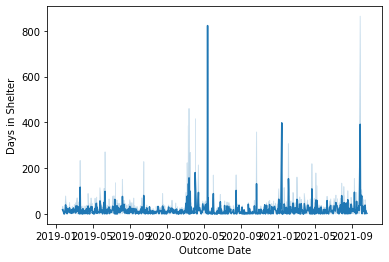

In [20]:
#dogs timeline from 01/21/2019 - 10/21/2021
sns.lineplot(x = 'Outcome Date', y = 'Days in Shelter', data = dogs_filtered_period)

#rule out the outlier

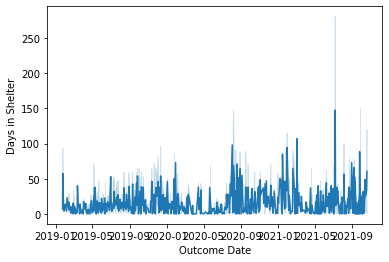

In [21]:
# cats timeline from 01/21/2019 - 10/21/2021
sns.lineplot(x = 'Outcome Date', y = 'Days in Shelter', data = cats_filtered_period)


NOTE: REMOVE OUTLIER FROM DOGS/ BETTER COMPARISON TO CATS 

- AT LEAST ONE DOG stayed for 800 days 
- Now, look at the outcome types during this period
- Why and how did they stay so long: 
    - their intake condition is well off? 
    - their breed is of a popular type? 
    - their age is low (YOUNG) or could be old so not much people are intereted in them 

In [22]:
#sns.lmplot(x="Outcome Date", y="Days in Shelter", data=dogs_filtered_period)

In [23]:
dogs_filtered_period["Outcome Type"]
dogDaysInShelter = dogs_filtered_period.sort_values(by='Days in Shelter', ascending=False)
dog_top10_longest = dogDaysInShelter[:10]
dog_top10_longest['Days in Shelter']
dog_top10_longest.iloc[0]

dog_top10_longest['Days in Shelter']

# dog_top10_longest_OutcomeType = dog_top10_longest['Outcome Type']
# dog_top10_longest_OutcomeType.value_counts()
# dog_top10_longest_OutcomeType

# make a list of days in shelter vs outcome type 

# FOUCS ON THE TOP 10: 
#look at the longest days and their outcome types
# could be n/a as there is no outcome, or they can be 
# dog_top10_longest.iloc[0]



686      1239
7792      891
6112      891
10703     865
16988     823
14526     793
2072      766
1644      762
5947      760
15729     582
Name: Days in Shelter, dtype: int64

In [24]:
# DOGS DURING 01/21/2019 - 10/21/2021
# obtaining data 
dogs_longest = dog_top10_longest['Days in Shelter']
dogs_longest_outcomeType = dog_top10_longest['Outcome Type']
dogs_longest_outcomeDate = dog_top10_longest['Outcome Date']
dogs_longest_breed = dog_top10_longest['Breed']
dogs_longest_name = dog_top10_longest['Name']


# isolating the date and putting to dataframe 
dogs_df_longest_outcome = dogs_longest.rename_axis('unique_values').to_frame('Days in Shelter')
dogs_df_longest_outcome['Outcome Type'] = dogs_longest_outcomeType.to_frame('Outcome Type')
dogs_df_longest_outcome['Outcome Date'] = dogs_longest_outcomeDate.to_frame('Outcome Date')
dogs_df_longest_outcome['Breed'] = dogs_longest_breed.to_frame('Breed')
dogs_df_longest_outcome['Name'] = dogs_longest_name.to_frame('Name')

dogs_df_longest_outcome

first_column = dogs_df_longest_outcome.pop('Name')
second_column = dogs_df_longest_outcome.pop('Breed')

dogs_df_longest_outcome.insert(0, 'Name', first_column)
dogs_df_longest_outcome.insert(1, 'Breed', second_column)

dogs_df_longest_outcome


,Name,Breed,Days in Shelter,Outcome Type,Outcome Date
unique_values,,,,,
686,CHARLIE,GOLDEN RETR,1239,DISPOSAL,2021-09-27
7792,ZIGZAG,DACHSHUND,891,TRANSFER,2020-04-02
6112,PEARL,DACHSHUND,891,TRANSFER,2020-04-02
10703,PEANUTS,DACHSHUND,865,ADOPTION,2020-03-07
16988,MOXIE,BORDER COLLIE,823,ADOPTION,2020-05-13
14526,QUIX,CATAHOULA/MIX,793,TRANSFER,2020-04-13
2072,MOLI,BORDER COLLIE,766,ADOPTION,2020-03-17
1644,GUS,GOLDEN RETR,762,ADOPTION,2020-03-13
5947,SPLASH,BORDER COLLIE,760,ADOPTION,2020-03-11


In [25]:
cats_filtered_period["Outcome Type"]
catDaysInShelter = cats_filtered_period.sort_values(by='Days in Shelter', ascending=False)
cat_top10_longest = catDaysInShelter[:10]
cat_top10_longest.head()['Days in Shelter']
cat_top10_longest.iloc[0]

cat_top10_longest_OutcomeType = cat_top10_longest['Outcome Type']
cat_top10_longest_OutcomeType.value_counts()


ADOPTION    8
DIED        1
TRANSFER    1
Name: Outcome Type, dtype: int64

In [26]:
# CATS DURING 01/21/2019 - 10/21/2021
# obtaining data 
cats_longest = cat_top10_longest['Days in Shelter']
cats_longest_outcomeType = cat_top10_longest['Outcome Type']
cats_longest_outcomeDate = cat_top10_longest['Outcome Date']
cats_longest_breed = cat_top10_longest['Breed']
cats_longest_name = cat_top10_longest['Name']

# isolating the date and putting to dataframe 
cats_df_longest_outcome = cats_longest.rename_axis('unique_values').to_frame('Days in Shelter')
cats_df_longest_outcome['Outcome Type'] = cats_longest_outcomeType.to_frame('Outcome Type')
cats_df_longest_outcome['Outcome Date'] = cats_longest_outcomeDate.to_frame('Outcome Date')
cats_df_longest_outcome['Breed'] = cats_longest_breed.to_frame('Breed')
cats_df_longest_outcome['Name'] = cats_longest_name.to_frame('Name')


cat_first_column = cats_df_longest_outcome.pop('Name')
cat_second_column = cats_df_longest_outcome.pop('Breed')
cats_df_longest_outcome.insert(0, 'Name', cat_first_column)
cats_df_longest_outcome.insert(1, 'Breed', cat_second_column)
cats_df_longest_outcome


,Name,Breed,Days in Shelter,Outcome Type,Outcome Date
unique_values,,,,,
1573,NaN,DOMESTIC SH,281,DIED,2021-07-07
1900,DERRICK,DOMESTIC LH,157,TRANSFER,2020-08-06
618,ARIES,DOMESTIC SH,150,ADOPTION,2021-09-25
5412,MARY-KATE,DOMESTIC SH,147,ADOPTION,2020-08-07
1593,ODIN,DOMESTIC LH,120,ADOPTION,2021-10-19
16955,MINNY,DOMESTIC SH,115,ADOPTION,2021-01-30
491,CHER,DOMESTIC SH,107,ADOPTION,2021-03-04
1649,WILLIE,DOMESTIC SH,106,ADOPTION,2021-08-28
19815,MAMMA MIA,DOMESTIC SH,102,ADOPTION,2019-08-14


The cat and dog that stayed in the shelter are disposed/died. From the top 10 cats and dogs that stayed the longest during the period 01/21/2019 - 10/21/2021 had an average of ~6 adoptions. 

In [27]:
dogs_filtered_period

,Unnamed: 0,Name,Named by Shelter,Type,Breed,Color,Sex,Protected,Size,Date Of Birth,...,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count,Age,Before Covid
0,0,REMY,False,DOG,BEAGLE,BLACK/WHITE,Female,False,MED,2014-04-11,...,OVER THE COUNTER_WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1,8.0,True
1,1,RONDE,True,DOG,CHIHUAHUA SH,TAN,Male,True,SMALL,2020-07-24,...,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,*PETALUMA,94954.0,"94954(38.245316, -122.59871)",1,1.0,True
7,7,RICKY,False,DOG,LABRADOR RETR/MIX,BLUE/WHITE,Male,True,MED,2020-01-04,...,OVER THE COUNTER_ARREST,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95403.0,"95403(38.486997, -122.749134)",1,2.0,True
8,8,CALISTA,False,DOG,LABRADOR RETR,YELLOW,Female,False,MED,2020-04-14,...,FLD_MCHIP,UNKNOWN,HEALTHY,SANTA ROSA,COUNTY,95403.0,"95403(38.486997, -122.749134)",1,2.0,True
9,9,COCO,False,DOG,GERM SHEPHERD/MIX,WHITE,Female,True,LARGE,NaT,...,FLD_MCHIP,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1,7.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20153,21923,NaN,False,DOG,CHIHUAHUA SH,TAN,Female,False,SMALL,NaT,...,AGGRESSIVE,UNTREATABLE,UNTREATABLE,*WINDSOR,NaN,NaN,NaN,1,15.0,False
20157,21927,COCO,False,DOG,LABRADOR RETR/PIT BULL,CHOCOLATE,Male,False,PUPPY,2018-11-01,...,OVER THE COUNTER_IDTAG,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95448.0,"95448(38.618857, -122.861927)",1,3.0,False
20160,21931,MIMI,False,DOG,PIT BULL/MIX,TAN/WHITE,Female,False,MED,2020-01-01,...,OVER THE COUNTER_CALL,HEALTHY,HEALTHY,COUNTY,COUNTY,95492.0,"95492(38.541541, -122.809202)",1,2.0,True
20165,21936,BUZZ,False,DOG,PARSON RUSS TER/MIX,TAN/WHITE,Male,False,SMALL,2012-11-07,...,OVER THE COUNTER_WEB,UNKNOWN,HEALTHY,COUNTY,COUNTY,95407.0,"95407(38.403734, -122.736775)",1,9.0,False


Now we want to take a look at the different outcome types for the period before the start of COVID (march 4, 2020) and after the start of COVID. By doing so, we can take a deeper look at .... 
before: jan 1, 2019 - march 3, 2020
after: march 4, 2020 - oct 21, 2021

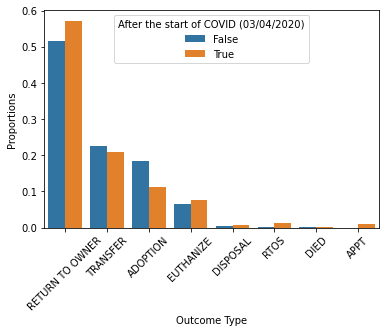

In [28]:
#FALSE = before: jan 1, 2019 - march 3, 2020 
#TRUE = after: march 4, 2020 - oct 21, 2021

dogs_filtered_period = dogs_filtered_period.assign(**{"After the start of COVID (03/04/2020)": dogs_filtered_period.loc[:,'Outcome Date'].ge(pd.to_datetime('March 4, 2020'))})
beforeafter_dogs = dogs_filtered_period.groupby("After the start of COVID (03/04/2020)")['Outcome Type'].value_counts(normalize=True).to_frame().rename(columns={'Outcome Type': 'Proportions'}).reset_index()
ax = sns.barplot(
    data=beforeafter_dogs,  
    x = 'Outcome Type', y = 'Proportions', hue = "After the start of COVID (03/04/2020)"
)    

ax.tick_params(axis='x', rotation=45)
plt.show()


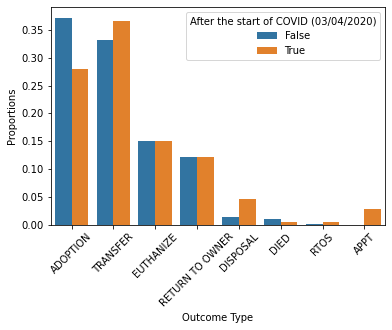

In [29]:
#FALSE = before: jan 1, 2019 - march 3, 2020 
#TRUE = after: march 4, 2020 - oct 21, 2021

cats_filtered_period = cats_filtered_period.assign(**{"After the start of COVID (03/04/2020)": cats_filtered_period.loc[:,'Outcome Date'].ge(pd.to_datetime('March 4, 2020'))})
beforeafter_cats = cats_filtered_period.groupby("After the start of COVID (03/04/2020)")['Outcome Type'].value_counts(normalize=True).to_frame().rename(columns={'Outcome Type': 'Proportions'}).reset_index()
ax2 = sns.barplot(
    data=beforeafter_cats,  
    x = 'Outcome Type', y = 'Proportions', hue = "After the start of COVID (03/04/2020)"
)    

ax2.tick_params(axis='x', rotation=45)
plt.show()

In [30]:
cats = cats.drop(columns=["Unnamed: 0"])
cats

,Name,Named by Shelter,Type,Breed,Color,Sex,Protected,Size,Date Of Birth,Impound Number,...,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count,Age,Before Covid
2,SNOOP,True,CAT,DOMESTIC SH,GRAY,Male,True,SMALL,2019-08-04,K21-039232,...,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95405.0,"95405(38.439152, -122.672541)",1,2.0,True
3,FIFI,False,CAT,SIAMESE,SEAL PT,Female,True,KITTN,2020-10-27,K21-037796,...,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1,1.0,True
4,MERLIN,True,CAT,DOMESTIC SH,BRN TABBY,Male,True,SMALL,2018-01-16,K21-037709,...,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,COUNTY,94952.0,"94952(38.236012, -122.730241)",1,4.0,True
5,ANDY,True,CAT,DOMESTIC SH,BLACK,Male,True,KITTN,2020-09-06,K20-037580,...,WESTFARM,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95436.0,"95436(38.491884, -122.90672)",1,1.0,True
6,ANNE,True,CAT,DOMESTIC SH,BLACK/WHITE,Female,True,KITTN,2020-09-06,K20-037581,...,WESTFARM,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95409.0,"95409(38.458965, -122.630156)",1,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20169,MISSY,True,CAT,DOMESTIC SH,BRN TABBY,Female,True,KITTN,2018-07-29,K18-029646,...,WALKIN,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,95404.0,"95404(38.458384, -122.675588)",1,3.0,False
20170,NaN,False,CAT,DOMESTIC MH,BLACK/WHITE,Unknown,False,SMALL,NaT,K14-007796,...,RETURN TO OWNER,TREATABLE/REHAB,TREATABLE/REHAB,SANTA ROSA,SANTA ROSA,95403.0,"95403(38.486997, -122.749134)",1,5.0,False
20171,NaN,False,CAT,DOMESTIC SH,GRAY/WHITE,Female,False,SMALL,NaT,K19-031738,...,ILL SEVERE,UNKNOWN,UNTREATABLE,SANTA ROSA,NaN,NaN,NaN,1,3.0,False
20172,NaN,False,CAT,DOMESTIC SH,GRAY,Unknown,False,KITTN,NaT,K18-027667,...,FORGOTTEN,UNKNOWN,HEALTHY,COUNTY,SANTA ROSA,95403.0,"95403(38.486997, -122.749134)",1,5.0,False


In [31]:
cats["Before Covid"] = cats.loc[:,'Outcome Date'].ge(pd.to_datetime('March 4, 2020'))

In [32]:
cats["Before Covid"]

2         True
3         True
4         True
5         True
6         True
         ...  
20169    False
20170    False
20171    False
20172    False
20175    False
Name: Before Covid, Length: 7829, dtype: bool

In [33]:
cats.pivot_table(index=cats["Before Covid"]
                 , columns = cats["Outcome Type"]
                 , aggfunc="size"
                 , fill_value = 0).apply(lambda x: x / x.sum(), axis = 1)

Outcome Type,ADOPTION,APPT,DIED,DISPOSAL,ESCAPED/STOLEN,EUTHANIZE,RETURN TO OWNER,RTOS,TRANSFER
Before Covid,,,,,,,,,
False,0.446728,0.000000,0.010786,0.011952,0.00102,0.172861,0.139338,0.000146,0.217170
True,0.279348,0.028261,0.004348,0.045652,0.00000,0.151087,0.121739,0.004348,0.365217


In [34]:
cats.pivot_table(index=cats["Adopted After COVID"]
                 , columns = cats["Outcome Type"]
                 , aggfunc="size"
                 , fill_value = 0).apply(lambda x: x / x.sum(), axis = 1)

KeyError: 'Adopted After COVID'